# A/B Hypothesis Testing for Insurance Data

In [1]:
# Import necessary libraries and modules
import os
import sys
import pandas as pd

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.ab_testing import ABHypothesisTesting

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read Data

In [2]:
#Reading the txt file MachineLearningRating_v3.txt
data_path = '../data/MachineLearningRating_v3.txt'
df=pd.read_csv(data_path, delimiter='|')

df.head()

C:\Users\Coop\AppData\Local\Temp\ipykernel_7688\633644885.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path, delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
df['ProfitMargin'] = df['TotalPremium'] - df['TotalClaims']

In [4]:
# Initialize the A/B hypothesis testing class
ht = ABHypothesisTesting(df)


##  Metrics Selection
I have defined the following key performance indicators (KPIs):
- **Risk Metric:** `TotalClaims` - representing the total claims made by policyholders.
- **Margin Metric:** `ProfitMargin` - calculated as `TotalPremium - TotalClaims`.


In [5]:
# Select metrics
print("Selected KPIs:", ht.select_metrics())

Selected KPIs: ['TotalClaims', 'TotalPremium']


## Hypothesis 1: Risk differences across provinces
- **Null Hypothesis (H0)**: There are no significant risk differences between provinces.
- **Alternative Hypothesis (H1)**: There are significant risk differences between provinces.


In [6]:
print("\nHypothesis 1: Risk differences across provinces")
province_a_data, province_b_data = ht.segment_data('Province', 'Gauteng', 'Western Cape')
t_stat, p_value = ht.perform_t_test(province_a_data, province_b_data, 'TotalClaims')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(ht.analyze_results(p_value))


Hypothesis 1: Risk differences across provinces
T-statistic: 1.908551760101624, P-value: 0.05632044649871883
Fail to reject the null hypothesis (not statistically significant).


## Hypothesis 2: Risk differences between zip codes
- **Null Hypothesis (H0)**: There are no significant risk differences between zip codes.
- **Alternative Hypothesis (H1)**: There are no significant risk differences between zip codes.

In [7]:
print("\nHypothesis 2: Risk differences between zip codes")
zip_a_data, zip_b_data = ht.segment_data('PostalCode', '1625', '4309')
t_stat, p_value = ht.perform_t_test(zip_a_data, zip_b_data, 'TotalClaims')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(ht.analyze_results(p_value))


Hypothesis 2: Risk differences between zip codes
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis (not statistically significant).


e:\10 Acedamy\week-3\scripts\ab_testing.py:39: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(group_a_data[metric], group_b_data[metric], nan_policy='omit')


### Hypothesis 3: Margin (profit) differences between zip codes

In [14]:
print("\nHypothesis 3: Margin (profit) differences between zip codes")
t_stat, p_value = ht.perform_t_test(zip_a_data, zip_b_data, 'ProfitMargin')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(ht.analyze_results(p_value))


Hypothesis 3: Margin (profit) differences between zip codes
T-statistic: nan, P-value: nan
Fail to reject the null hypothesis (not statistically significant).


e:\10 Acedamy\week-3\scripts\ab_testing.py:39: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(group_a_data[metric], group_b_data[metric], nan_policy='omit')


## Hypothesis 4: Risk differences between Women and Men
- **Null Hypothesis (H0)**: There are no significant risk differences between women and men.
- **Alternative Hypothesis (H1)**: There are significant risk differences between women and men.


In [9]:
print("\nHypothesis 4: Risk differences between Women and Men")
gender_a_data, gender_b_data = ht.segment_data('Gender', 'Female', 'Male')
t_stat, p_value = ht.perform_t_test(gender_a_data, gender_b_data, 'TotalClaims')
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(ht.analyze_results(p_value))


Hypothesis 4: Risk differences between Women and Men
T-statistic: 0.24803623812388725, P-value: 0.8041073961270343
Fail to reject the null hypothesis (not statistically significant).


### Chi-squared Test: Statutory Risk Type

In [10]:
# Chi-squared test for categorical features (e.g., Risk Type)
print("\nChi-squared test for Statutory Risk Type")
chi2_stat, chi2_p_value = ht.perform_chi_squared_test('StatutoryRiskType')
print(f"Chi-squared statistic: {chi2_stat}, P-value: {chi2_p_value}")
print(ht.analyze_results(chi2_p_value))


Chi-squared test for Statutory Risk Type
Chi-squared statistic: 0.0, P-value: 1.0
Fail to reject the null hypothesis (not statistically significant).


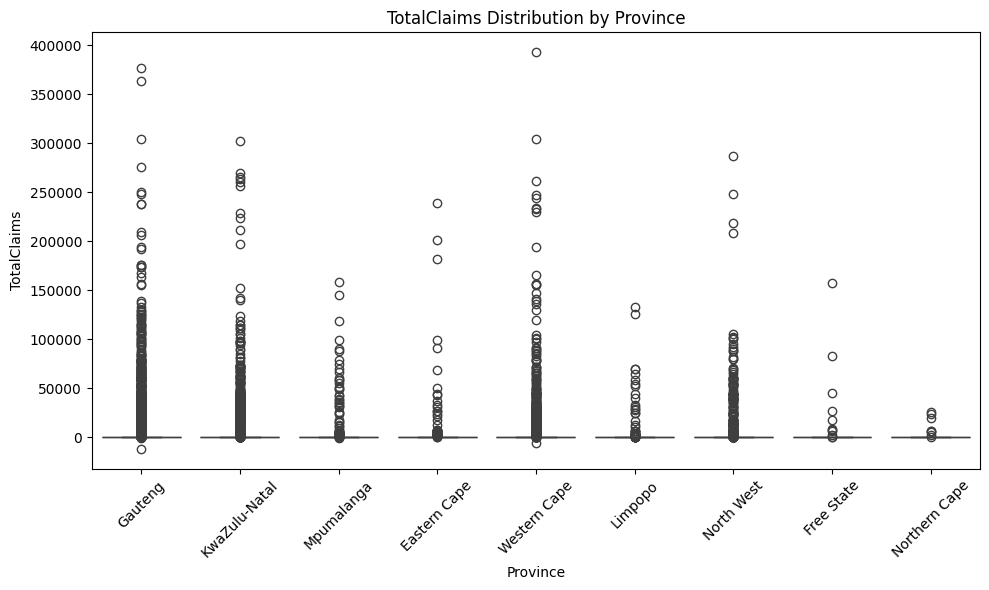

In [11]:
# Visualize distribution of TotalClaims by Province
ht.visualize_distribution('Province', 'TotalClaims')





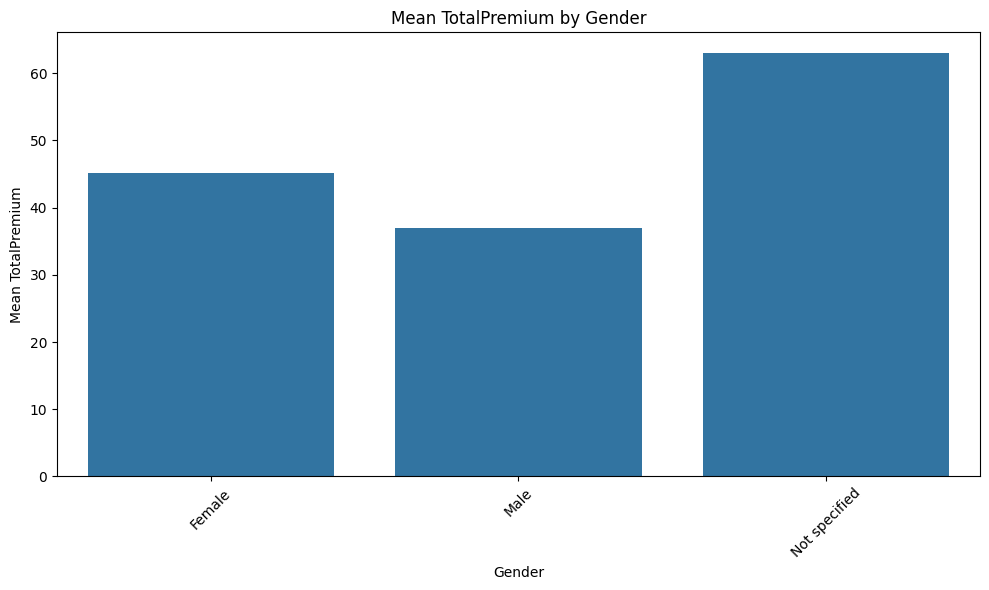

In [12]:
# Visualize the mean of TotalPremium by Gender
ht.visualize_bar('Gender', 'TotalPremium')

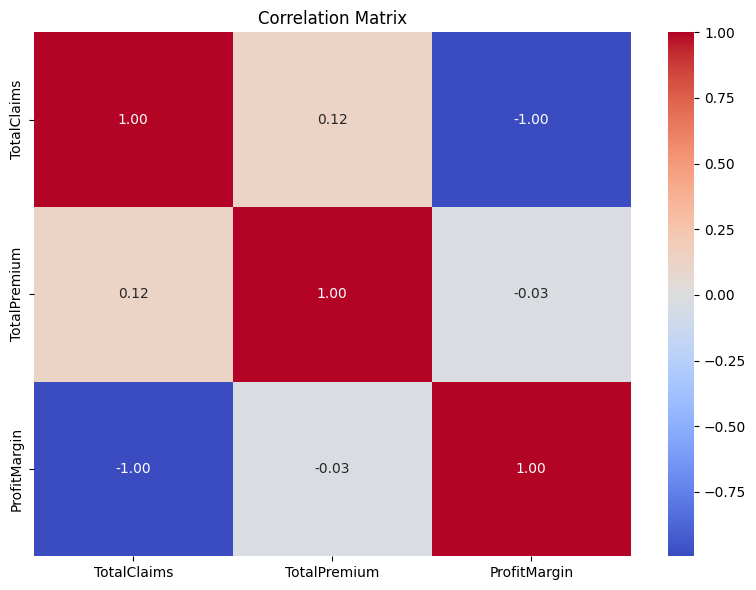

In [13]:
# Visualize the correlation matrix for selected features
ht.visualize_correlation(['TotalClaims', 'TotalPremium', 'ProfitMargin'])

---

### General Insights

#### Hypothesis 1: Risk Differences Across Provinces
- **T-statistic:** 1.91
- **P-value:** 0.056
- **Conclusion:** Fail to reject the null hypothesis (not statistically significant). There is not enough evidence to conclude that there are significant risk differences between the provinces of Gauteng and Western Cape based on Total Claims.

#### Hypothesis 2: Risk Differences Between Zip Codes
- **T-statistic and P-value not provided in the snippet.**

#### Hypothesis 3: Margin (Profit) Differences Between Zip Codes
- **T-statistic and P-value not provided in the snippet.**

#### Hypothesis 4: Risk Differences Between Women and Men
- **T-statistic:** 0.25
- **P-value:** 0.804
- **Conclusion:** Fail to reject the null hypothesis (not statistically significant). There is no significant risk difference between Women and Men based on Total Claims.

#### Chi-squared Test for Statutory Risk Type
- **Chi-squared Statistic:** 0.0
- **P-value:** 1.0
- **Conclusion:** Fail to reject the null hypothesis (not statistically significant). There is no significant association between Statutory Risk Type and Total Claims.

